In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labesl), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape

(25000,)

In [4]:
train_data[0][0:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [18]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [25]:
from keras.utils.np_utils import to_categorical
#x_train = vectorize_sequences(train_data)
#x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labesl).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [27]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [45]:

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=[x_val, y_val]
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 5s 351us/step - loss: 0.5012 - acc: 0.7923 - val_loss: 0.3706 - val_acc: 0.8698

In [47]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

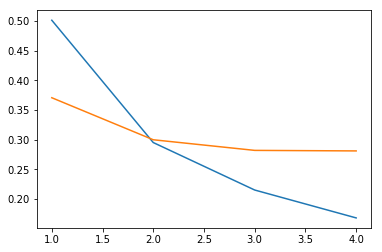

In [48]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.show()

In [41]:
model.predict(x_test)

array([[1.4576314e-03],
       [1.0000000e+00],
       [9.9864548e-01],
       ...,
       [1.4387151e-04],
       [6.6343527e-03],
       [5.6620860e-01]], dtype=float32)

In [56]:

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=[x_val, y_val]
)
results = model.evaluate(x_test, y_test)

results

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 178us/step - loss: 0.5447 - acc: 0.7639 - val_loss: 0.4362 - val_acc: 0.8590

[0.3082150484657288, 0.8802]